
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---

# Trabajo práctico entregable - Parte 2

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [ ]:
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                     \
                             count          mean            std   min   
profile_gender                                                          
Hombre                      4944.0  98836.063558  102159.664237   1.0   
Mujer                        908.0  73501.414465   56256.880181   2.0   
Otros                         31.0  95441.354839   88635.674358  40.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          53285.0  80000.0  110000.0  2080000.0  
Mujer           43818.0  65000.0   92000.0   800000.0  
Otros           39500.0  74000.0  117500.0   380000.0

In [ ]:
# Eliminación de outliers
def clean_outliers(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    # Computing IQR
    Q1 = dataset[column_name].quantile(0.25)
    Q3 = dataset[column_name].quantile(0.75)
    IQR = Q3 - Q1  
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (interesting_col <= (Q3+1.5*IQR))
    mask_outlier &= (interesting_col >= (Q1-1.5*IQR))
    return dataset[mask_outlier]
df_limpio = clean_outliers(df, "salary_monthly_NETO")

In [ ]:
df_limpio[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                             \
                             count          mean           std   min      25%   
profile_gender                                                                  
Hombre                      4576.0  78163.490217  37287.784011   1.0  51000.0   
Mujer                        887.0  67907.449080  35161.185184   2.0  43477.5   
Otros                         27.0  67284.518519  44023.825723  40.0  39000.0   

                                             
                    50%       75%       max  
profile_gender                               
Hombre          75290.5  100000.0  187000.0  
Mujer           64000.0   90000.0  178951.0  
Otros           54000.0   95400.0  175000.0

In [ ]:
alpha = 0.05

In [ ]:
is_man = df_limpio.profile_gender == 'Hombre'

groupA = df_limpio[is_man].salary_monthly_NETO
groupB = df_limpio[~is_man].salary_monthly_NETO

0        43000.0
2       127000.0
9        39000.0
17       70000.0
25       98700.0
          ...   
6057     57000.0
6058     57000.0
6073      8000.0
6077     30000.0
6084     77800.0
Name: salary_monthly_NETO, Length: 914, dtype: float64

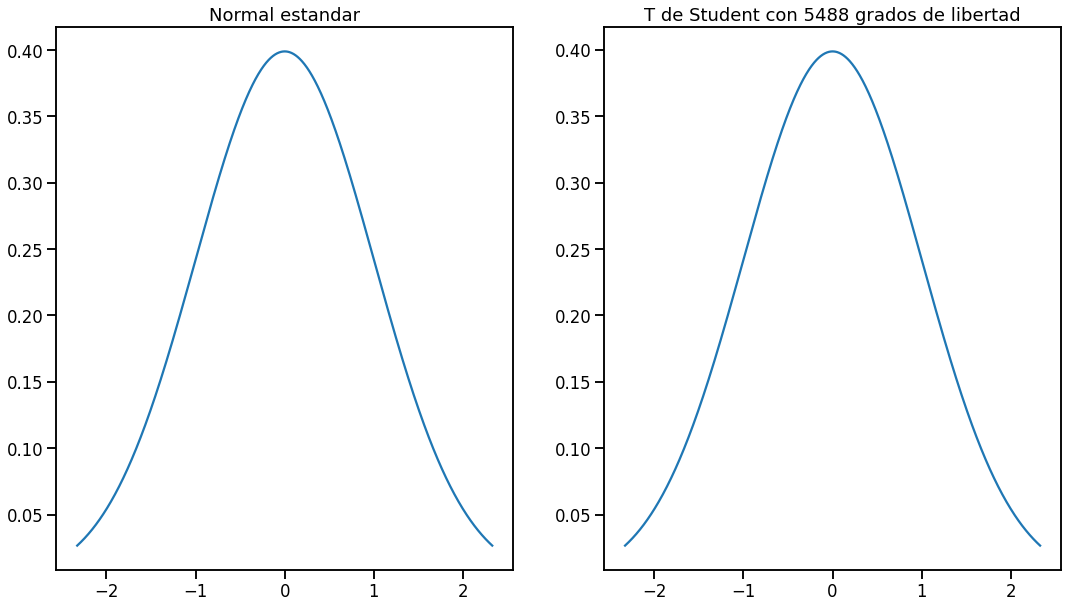

In [ ]:
from seaborn.categorical import countplot
import scipy.stats
n1=groupA.count()
n2=groupB.count()

# Graficando la normal estandar
norm= scipy.stats.norm(0,1)
x1 = numpy.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 1000)
fp1 = norm.pdf(x1) # Función de Probabilidad

# Graficando la t de Student
n = n1+n2-2 # parametro de forma.
t_destu = scipy.stats.t(n)
x2 = numpy.linspace(t_destu.ppf(0.01),
                t_destu.ppf(0.99), 1000)
fp2 = t_destu.pdf(x2) # Función de Probabilidad

#se puede ver que los graficos coinciden
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
axes[0].set_title('Normal estandar')
axes[1].set_title(f'T de Student con {n} grados de libertad')
seaborn.lineplot(ax=axes[0],x=x1,y=fp1)
seaborn.lineplot(ax=axes[1],x=x2,y=fp2)

## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

**Estimación puntual del parámetro** $\mu_1-\mu_2$**:**

Un buen estimador de la media es la media muestral
$\bar{X}=\frac{1}{n}\sum_{i=1}^nx_i$

Para estimar la diferencia de medias usamos
$\bar{X}-\bar{Y}\xrightarrow[n\rightarrow \infty]\\ \mu_1-\mu_2$

**Intervalo de confianza:**

Usamos el estadístico pivote
$T=\frac{(\bar{X}-\bar{Y})-(\mu_1-\mu_2)}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$

que tiene distribución t de Student con
$\nu=\frac{\left(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}\right)^2}{\frac{\left(\frac{s_1^2}{n_1}\right)^2}{n_1+1}+{\frac{\left(\frac{s_2^2}{n_2}\right)^2}{n_2+1}}}-2$ grados de libertad

Como las muestras son suficientemente grandes, la distribución es muy parecida a la distribución Normal estándar.

Calculamos el *intervalo de confianza* planteando:

$P(-t_{\alpha/2,\nu}\leq T \leq t_{\alpha/2,\nu})=1-\alpha$

y despejamos el parámetro que queremos estimar, en este caso $\mu_1-\mu_2$, llegamos a que

$P\left((\bar{X}-\bar{Y})-t_{\alpha/2,\nu} {\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}} \leq \mu_1 - \mu_2\leq (\bar{X}-\bar{Y})+t_{\alpha/2,\nu} {\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}} \right)=1-\alpha$

In [ ]:
# Calculando la estimacion puntual:
# Queremos estimar la diferencia de medias
# Cada media se estima con el promedio muestral
estimacion_mu1=groupA.mean()
estimacion_mu2=groupB.mean()
estimacion_puntual_mu=estimacion_mu1-estimacion_mu2

print('La estimación puntual de la diferencia de las medias es: ', estimacion_puntual_mu)


La estimación puntual de la diferencia de las medias es:  10274.442805404688


In [ ]:
# Calculando el intervalo de confianza
estadistico_media_H=groupA.mean()
estadistico_media_NoH=groupB.mean()

s1=groupA.std()
s2=groupB.std()

n1=groupA.count()
n2=groupB.count()
alpha=0.05
# Cuando el numero de grados de libertad de la t es muy grande 
# se parece a una normal estándar (es el caso, por eso coincide el t_0975 con el z_0975)
t_0975=1.96

# Calculamos el intervalo de confianza con T de Student:
lim_inf_IC=(estadistico_media_H-estadistico_media_NoH)-t_0975*(numpy.sqrt((pow(s1,2)/n1)+pow(s2,2)/n2))
lim_sup_IC=(estadistico_media_H-estadistico_media_NoH)+t_0975*(numpy.sqrt((pow(s1,2)/n1)+pow(s2,2)/n2))
lim_inf_IC, lim_sup_IC
#Podemos ver que el parametro estimado mu cae dentro del IC, lo que es una buena señal.

(7736.357498037031, 12812.528112772343)

In [ ]:
#Longitud del intervalo de confianza:
lim_sup_IC-lim_inf_IC

5076.170614735312

## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$H_0=...$

**Estadístico (Pivote)**
  * Identificar el estadístico
  * Escribir qué distribución tiene bajo $H_0$


**Test de Hipótesis:**

$H_0: \mu_1=\mu_2$   vs.    $H_1: \mu_1\neq \mu_2$

El estadístico pivote (bajo la hipótesis nula) es:


$T_0=\frac{\bar{X}-\bar{Y}}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$

Tiene distribución t de Student con
$\frac{\left(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}\right)^2}{\frac{\left(\frac{s_1^2}{n_1}\right)^2}{n_1+1}+{\frac{\left(\frac{s_2^2}{n_2}\right)^2}{n_2+1}}}-2$ grados de libertad

Fijado el $\alpha=0.05$,
$P\left(|{T_0}| \geq t_{0975}\right)=0.05$



In [ ]:
#grados de libertad de la t
Nu=pow((pow(s1,2)/n1)+(pow(s2,2)/n2),2)/((pow((pow(s1,2)/n1),2)/(n1+1))+(pow(pow(s2,2)/n2,2)/(n2+1)))-2
Nu


1349.5416391136307

### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

Para calcular el p-valor, debemos calcular la probabilidad
$P\left(|{T_0}| \geq \frac{\bar{x}-\bar{y}}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}\right)$

donde $\bar{x}$ y $\bar{y}$ son las medias muestrales correspondientes al grupo A o grupo B respectivamente.

Si el p-valor es mayor que $\alpha$, acepto $H_0$

Si el p-valor es menor que $\alpha$, rechazo $H_0$

In [ ]:
scipy.stats.ttest_ind(groupA, groupB, axis=0, equal_var=False, nan_policy='omit')

#El p-valor da muuuuy chico ---> rechazo H_O, es decir, las medias no son iguales... y no! Tiene sentido...

Ttest_indResult(statistic=7.934291191921721, pvalue=4.415935785618953e-15)

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [ ]:
from statsmodels.stats.power import tt_ind_solve_power

In [ ]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)
power=0.99
len(groupA), ratio

(4576, 0.19973776223776224)

In [ ]:
#esto va a calcular cual debiera ser el tamanio de la muestra groupA para que la potencia del 
#test sea igual a "power"

tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)

1313.5133176120123

In [ ]:
#si le pasamos el dato "numero de observaciones", nos devuelve el poder del test =1
#probabilidad casi nula de cometer errores de tipo II
#proba casi nula de aceptar que las medias son iguales

#o sea que con este tamaño de muestra y el nivel de significancia elegido (alpha=0.05)
#es muy improbable que se acepte que las medias son iguales.
tt_ind_solve_power(effect_size=effect_size, nobs1= len(groupA), alpha=alpha, power=None, ratio=ratio)


1.0

Vemos que el tamaño de la muestra es considerablemente mayor a lo necesario para que la potencia del test sea 0.95. Es decir que con esta muestra hay baja probabilidad de aceptar la hipótesis nula cuando es falsa (baja probabilidad de cometer errores del Tipo II).



## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.


Para desarrollar los elementos del ejercicio de la Comunicación y Visualización hemos armado una Notebook aparte en el siguiente enlace: [link a la notebook de comunicación y visualización](https://colab.research.google.com/drive/1bbRX_FxAFc3gVW3IjshdHkerxj-KglcO?usp=sharing)